<a href="https://colab.research.google.com/github/AlagappanSenthilkumar/Covid-Vaccine/blob/main/DAC_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-87c1186d0c6f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


         date  total_vaccinations  daily_vaccinations
0  2021-05-27            593313.0              6487.0
1  2021-06-03            630305.0              5285.0
2  2022-01-27           5081064.0              9802.0
3  2021-02-18              3049.0               254.0
4  2021-05-11            622507.0             12160.0


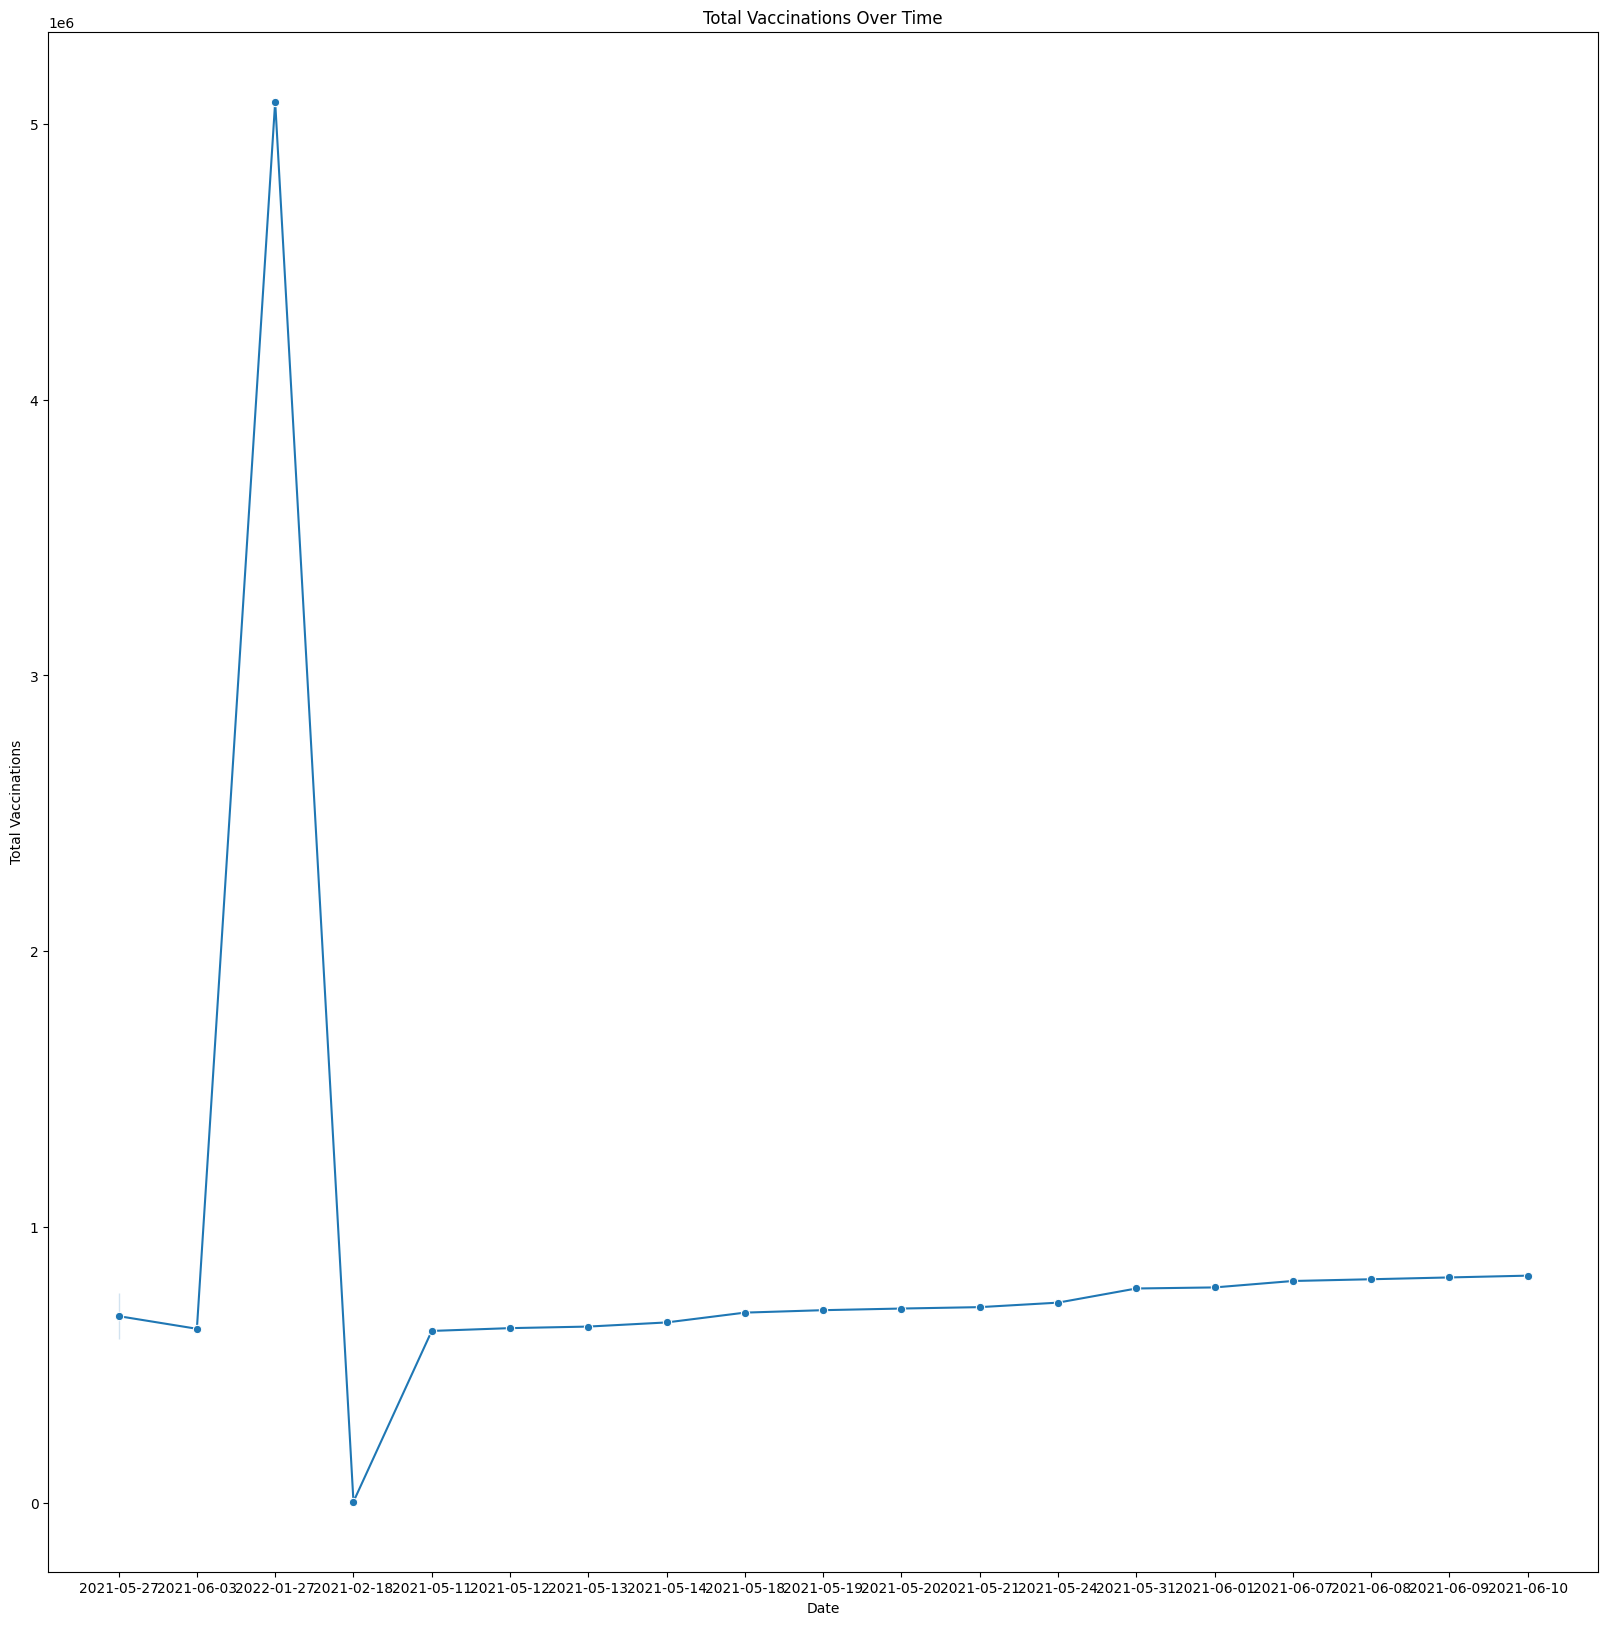

In [5]:
import pandas as pd


df = pd.read_csv('country_vaccinations.csv')


df = df.dropna()


df['date'] = pd.to_datetime(df['date'])


df = df.drop_duplicates()


df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day


df = df[(df['total_vaccinations'] - df['total_vaccinations'].mean()) < 3 * df['total_vaccinations'].std()]


df = pd.get_dummies(df, columns=['country'])

selected_features = ['date', 'total_vaccinations', 'daily_vaccinations']
df = df[selected_features]

df.to_csv('preprocessed_dataset.csv', index=False)
df = pd.read_csv('preprocessed_dataset.csv')
print(df.head())
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Line plot for total vaccinations over time
plt.figure(figsize=(20, 20))
sns.lineplot(x='date', y='total_vaccinations', data=df.head(20), marker='o')
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.show()
df = pd.read_csv('country_vaccinations.csv')
df=df.dropna()
# Bar plot for daily vaccinations per country
plt.figure(figsize=(100,100))
sns.barplot(x='iso_code', y='daily_vaccinations', data=df)
plt.title('Daily Vaccinations by Country')
plt.xlabel('Country ISO Code')
plt.ylabel('Daily Vaccinations')
plt.xticks(rotation=45)
plt.show()